# Caluclate the percentage of subscateogry 

In [8]:
# caluclate distribution before manipulating data

import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'filtered_combined_road_bikes_2020-2024.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Count the occurrences of each unique value in the 'subcategory' column
subcategory_counts = df['subcategory'].value_counts()

# Calculate the percentage of each unique instance
total_instances = len(df)
percentage_per_instance = (subcategory_counts / total_instances) * 100

# Print the results
print("Percentage of unique instances in the 'subcategory' column:")
print(percentage_per_instance)


Percentage of unique instances in the 'subcategory' column:
subcategory
gravel          36.502366
race            26.605473
endurance       18.388926
aero             7.410667
triathlon        3.771061
cyclocross       3.263528
touring          2.044992
general-road     1.180814
track            0.832171
Name: count, dtype: float64


Percentage of unique instances in the 'subcategory' column:
subcategory
gravel          38.007254
race            23.754177
endurance       19.070737
aero             8.565839
triathlon        4.029471
cyclocross       3.705343
touring          1.914784
track            0.485478
general-road     0.466916
Name: count, dtype: float64


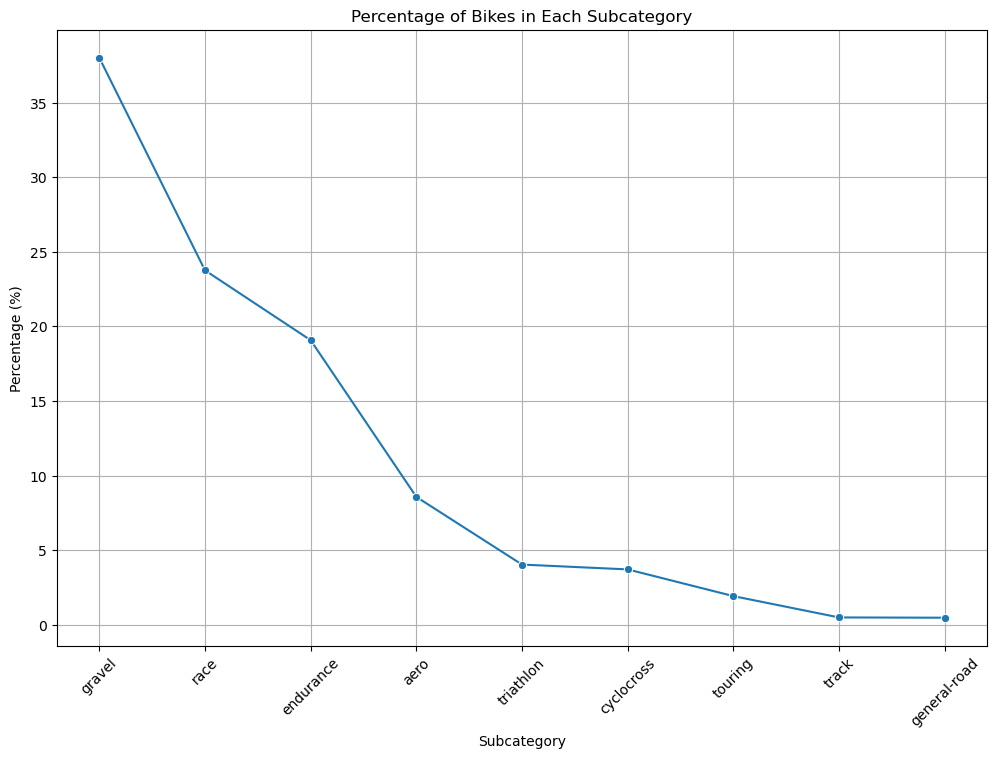

In [9]:
# caluclate distribution after manipulating data


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'std_all_road_bikes_with_ratios_2020-2024.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Count the occurrences of each unique value in the 'subcategory' column
subcategory_counts = df['subcategory'].value_counts()

# Calculate the percentage of each unique instance
total_instances = len(df)
percentage_per_instance = (subcategory_counts / total_instances) * 100

# Print the results
print("Percentage of unique instances in the 'subcategory' column:")
print(percentage_per_instance)

# Create a line chart for the percentage of bikes in each subcategory
plt.figure(figsize=(12, 8))
sns.lineplot(x=percentage_per_instance.index, y=percentage_per_instance.values, marker='o')
plt.title('Percentage of Bikes in Each Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


    subcategory  percentage  adjusted_percentage
0        gravel   38.007254             4.082303
1          race   23.754177            -4.452123
2     endurance   19.070737            -3.245567
3          aero    8.565839            -1.784848
4     triathlon    4.029471            -0.896708
5    cyclocross    3.705343             3.568267
6       touring    1.914784             1.824828
7         track    0.485478             0.444070
8  general-road    0.466916             0.459777


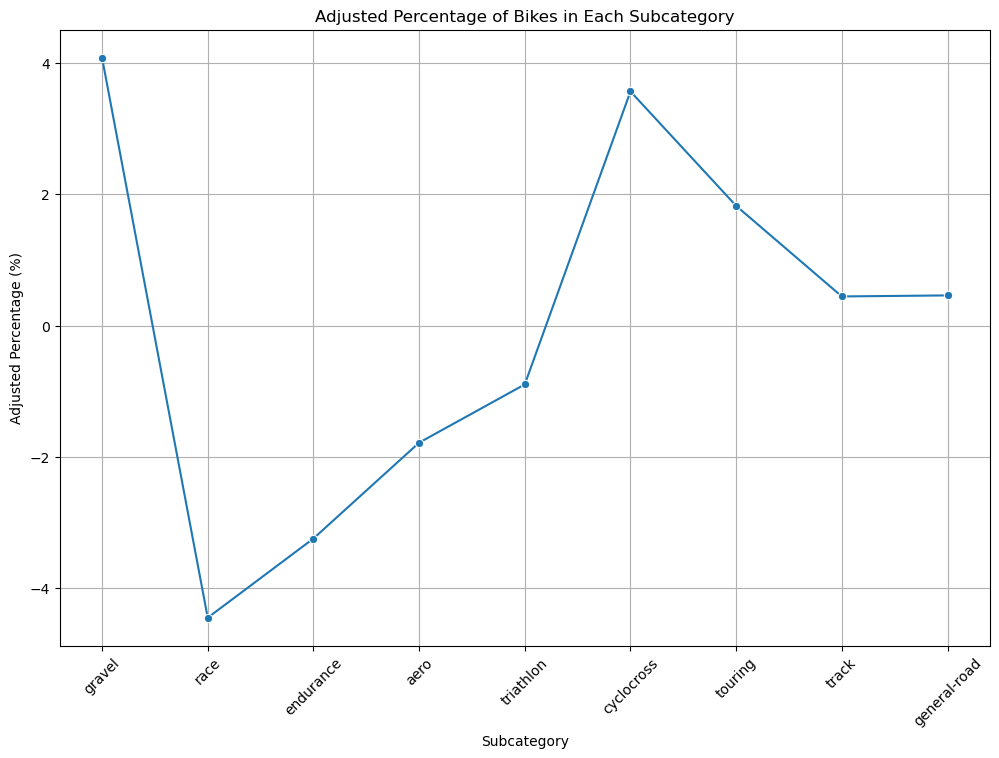

In [3]:
# Actual values vs clustering algorithm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given values for subcategories
subcategory_percentages = {
    'gravel': 38.007254,
    'race': 23.754177,
    'endurance': 19.070737,
    'aero': 8.565839,
    'triathlon': 4.029471,
    'cyclocross': 3.705343,
    'touring': 1.914784,
    'track': 0.485478,
    'general-road': 0.466916
}

# Given values for clusters
cluster_percentages = [
    33.924951,
    28.206300,
    22.316304,
    10.350687,
    4.926179,
    0.137076,
    0.089956,
    0.041408,
    0.007139
]

# Convert the subcategory percentages to a DataFrame
subcategory_df = pd.DataFrame(list(subcategory_percentages.items()), columns=['subcategory', 'percentage'])

# Convert the cluster percentages to a DataFrame
cluster_df = pd.DataFrame(cluster_percentages, columns=['percentage'])

# Ensure both DataFrames have the same length
if len(subcategory_df) != len(cluster_df):
    raise ValueError("The number of subcategories does not match the number of clusters.")

# Subtract cluster percentages from subcategory percentages
subcategory_df['adjusted_percentage'] = subcategory_df['percentage'] - cluster_df['percentage']

# Print the adjusted percentages
print(subcategory_df)

# Create a line chart for the adjusted percentage of bikes in each subcategory
plt.figure(figsize=(12, 8))
sns.lineplot(x=subcategory_df['subcategory'], y=subcategory_df['adjusted_percentage'], marker='o')
plt.title('Adjusted Percentage of Bikes in Each Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Adjusted Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [62]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'filtered_combined_road_bikes_2020-2024.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Count the number of unique values in the 'id' column
unique_ids = df['id'].nunique()

# Print the result
print("Number of unique values in the 'id' column:", unique_ids)


Number of unique values in the 'id' column: 15603


# Calculating Missing Values

In [1]:
# This function calculates the total percentage of rows that contain at least one missing value

import pandas as pd

def count_rows_with_missing_values(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Total number of rows in the DataFrame
    total_rows = len(df)
    
    # Check for any missing values in each row
    missing_rows = df.isnull().any(axis=1)
    
    # Count the number of rows with at least one missing value
    count_missing_rows = missing_rows.sum()
    
    # Calculate the percentage of rows with at least one missing value
    percentage_missing = (count_missing_rows / total_rows) * 100
    
    return count_missing_rows, total_rows, percentage_missing

# Specify the path to your CSV file
file_path = 'encoded_road_bikes_2020-2024.csv'

# Get the count of missing rows, total rows, and the percentage
missing_count, total_count, missing_percentage = count_rows_with_missing_values(file_path)
print(f'Total number of rows: {total_count}')
print(f'Number of rows with at least one missing value: {missing_count}')
print(f'Percentage of rows with at least one missing value: {missing_percentage:.2f}%')


Total number of rows: 70034
Number of rows with at least one missing value: 6
Percentage of rows with at least one missing value: 0.01%


In [5]:
# Calculates the percentage each column contributes to entire dataset. 

import pandas as pd

def calculate_missing_value_percentages(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Calculate the total number of missing values in the DataFrame
    total_missing_values = df.isnull().sum().sum()
    
    # Calculate the number of missing values for each column
    missing_values_per_column = df.isnull().sum()
    
    # Calculate the percentage contribution of each column to the total missing values
    missing_percentage_per_column = (missing_values_per_column / total_missing_values) * 100
    
    return missing_percentage_per_column

# Specify the path to your CSV file
file_path = 'imputed_road_bikes_2020-2024.csv'

# Calculate the percentage contribution of missing values by each column
column_missing_percentages = calculate_missing_value_percentages(file_path)
print("Percentage of missing values contributed by each column:")
print(column_missing_percentages)


Percentage of missing values contributed by each column:
subcategory                                             0.0
geometry.source.headTubeAngle_radians                   0.0
geometry.source.seatTubeAngle_radians                   0.0
normalized_geometry.source.chainstayLengthMM            0.0
normalized_geometry.computed.bottomBracketHeightMM      0.0
normalized_geometry.source.bottomBracketDropMM          0.0
normalized_geometry.source.stackMM                      0.0
normalized_geometry.source.trailMM                      0.0
normalized_geometry.source.reachMM                      0.0
normalized_geometry.source.rakeMM                       0.0
normalized_geometry.source.wheelbaseMM                  0.0
SRR                                                     0.0
AI                                                      0.0
CS/BBD                                                  0.0
ETT/S                                                   0.0
T/WB                                       

In [12]:
# Calculate % of missing values per column

import pandas as pd

def calculate_missing_value_percentages(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Calculate the number of missing values for each column
    missing_values_per_column = df.isnull().sum()
    
    # Calculate the total number of entries per column
    total_entries_per_column = len(df)
    
    # Calculate the percentage of missing values for each column
    missing_percentage_per_column = (missing_values_per_column / total_entries_per_column) * 100
    
    return missing_percentage_per_column

# Specify the path to your CSV file
file_path = 'all_road_bikes_with_ratios_2020-2024.csv'

# Calculate the percentage of missing values by each column
column_missing_percentages = calculate_missing_value_percentages(file_path)
print("Percentage of missing values per column:")
print(column_missing_percentages)


Percentage of missing values per column:
subcategory                                           0.0
geometry.source.stackMM                               0.0
geometry.source.reachMM                               0.0
geometry.source.topTubeLengthMM                       0.0
geometry.source.seatTubeLengthMM                      0.0
geometry.source.chainstayLengthMM                     0.0
geometry.source.bottomBracketDropMM                   0.0
geometry.source.wheelbaseMM                           0.0
geometry.source.rakeMM                                0.0
geometry.source.trailMM                               0.0
geometry.computed.stackReachRatio                     0.0
geometry.computed.bottomBracketHeightMM               0.0
geometry.source.frontCenterMM                         0.0
geometry.source.headTubeAngle_radians                 0.0
geometry.source.seatTubeAngle_radians                 0.0
normalized_geometry.source.chainstayLengthMM          0.0
normalized_geometry.computed.bo

In [3]:
# This function is used to confirm the combining road bike folder works properly. 

import pandas as pd

def calculate_missing_pair_percentage(file_path, column1, column2):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Identify rows where both specified columns are missing values
    missing_both = df[df[column1].isnull() & df[column2].isnull()]
    
    # Calculate the total number of rows in the DataFrame
    total_rows = len(df)
    
    # Calculate the percentage of rows where both columns are missing
    percentage_missing_both = (len(missing_both) / total_rows) * 100
    
    return percentage_missing_both

# Specify the path to your CSV file
file_path = 'all_road_bikes_2020-2024.csv'

# Specify the columns to check for missing values
column1 = 'geometry.source.trailMM'
column2 = 'geometry.computed.trailMM'

# Calculate the percentage of rows where both specified columns are missing
missing_percentage = calculate_missing_pair_percentage(file_path, column1, column2)
print(f"Percentage of rows missing values in both {column1} and {column2}: {missing_percentage:.2f}%")


Percentage of rows missing values in both geometry.source.trailMM and geometry.computed.trailMM: 25.49%


In [44]:
# Calculating unique sizes 

import pandas as pd

def get_unique_values(file_path, column_name):
    # Load the dataset from a CSV file
    df = pd.read_csv(file_path)
    
    # Get unique values from the specified column
    unique_values = df[column_name].dropna().unique()
    
    return unique_values

# Specify the path to your CSV file
file_path = 'all_road_bikes_2020-2024.csv'

# Specify the column you want to search
column_name = 'name'

# Get unique values in the specified column
unique_values = get_unique_values(file_path, column_name)

# Print the unique values
print(f"Unique values in {column_name}:")
print(unique_values)


Unique values in name:
['XXS' 'XS' 'SM' 'MD' 'LG' 'XL' 'XXL' 'XXXS' 'XXXL' '47cm' '50cm' '52cm'
 '54cm' '56cm' '58cm' '60cm' '62cm' '64cm' '44cm' '53cm' '61cm' 'MD/LG'
 '49cm' '48cm' '51cm' '57cm' '59cm' '42cm' '46cm' 'SM/MD' '4XS' '42.5cm'
 '46.5cm' '51.5cm' '55cm' '57.5cm' '59.5cm' '63cm' '48.5cm' 'SM High'
 'SM Low' 'MD High' 'MD Low' 'LG High' 'LG Low' 'XL High' 'XL Low' '43cm'
 '54.5cm' '40cm' 'MD-Short' '50.5cm' '55.5cm' '60.5cm' '45.5cm' '38cm'
 '52.5cm' '41cm' '5 9cm' '45cm' '49.5cm' '470mm/XSM' '560mm/LAR' '15.5"'
 '17.5"' '19.5"' '21.5"' 'One Size' '19"' '480mm' '510mm' '540mm' '570mm'
 '58.5cm' '41.5cm' '51cm High' '51cm Low' '54cm High' '54cm Low'
 '56cm High' '56cm Low' '58cm High' '58cm Low' '60cm High' '60cm Low'
 '59cm High' '59cm Low' '60m' '-' '66cm' '67cm' '69cm' '71cm' '73cm' 'ï¿½'
 '61.5cm' '63.5cm' '68.5cm' '71.5cm' '73.5cm' '42s' '45s' '48s' '50s'
 '52s' '54s' '56s' '58s' '65cm' 'XXS47' 'XS49' 'S52' 'M54' 'L56' 'HI' 'LO'
 'SX' 'LGE' 'Unique size' '15"' '16"' '20"

# Determing number of Clusters (K)

### Elbow Method

This helps define the number of clusters (k). 
This is required before the clustering algorithm can be run. 

/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

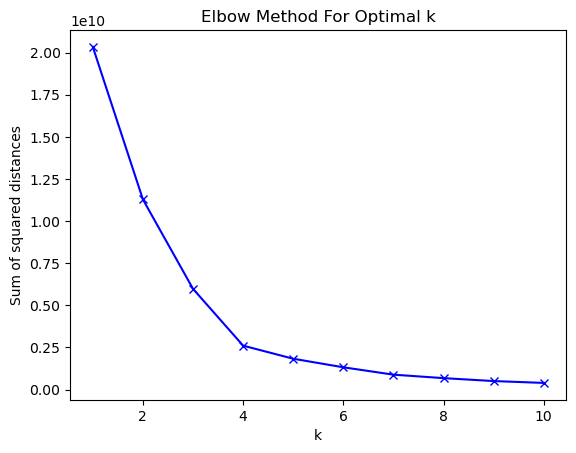

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Reading the CSV file
data = pd.read_csv('ready_for_clustering_2020-2024.csv')

# Step 2: Optionally, select relevant columns if necessary
# data = data[['feature1', 'feature2', 'feature3']]

# Step 3: Apply the Elbow Method
ssd = []
K = range(1, 11)  # Example range for k
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    ssd.append(km.inertia_)

# Plotting the Elbow
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


### Silhouette Method

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('ready_for_clustering_2020-2024.csv')

# Step 2: Optional - Select relevant columns if your CSV contains more than the required features
# df = df[['feature1', 'feature2', '...']]

# Step 3: Calculate silhouette scores for different numbers of clusters
silhouette_scores = {}
for k in [3, 4]:
    # Notice the inclusion of n_init=10 to address the warning
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df)
    score = silhouette_score(df, km.labels_)
    silhouette_scores[k] = score

print(silhouette_scores)


{3: 0.9969686345993551, 4: 0.9973109679873221}
